    ## Ahmad Droobi

## The sparks Foundation internship

### Task5 : Exploratory Data Analysis - Sports ('Indian Premier League')

### importing libraries

In [2]:
# importing libraries:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset :

In [3]:
# The First Dataset:
df_match=pd.read_csv('matches.csv')
df_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# The Second Dataset:
df_deliver=pd.read_csv('deliveries.csv')
df_deliver.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Data Exploration:

In [5]:
df_match.shape

(756, 18)

In [6]:
df_deliver.shape

(179078, 21)

In [7]:
# we will merge some columns from df_match to df_deliver:
df_match[['id','season','winner']]

df=df_deliver.merge(df_match[['id','season','winner']],how='inner',left_on='match_id',right_on='id')
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,0,1,NaN,NaN,NaN,11415,2019,Mumbai Indians
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,11415,2019,Mumbai Indians
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,0,1,SR Watson,run out,KH Pandya,11415,2019,Mumbai Indians
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,11415,2019,Mumbai Indians


## Exploring The Data:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
df.describe().round(2)

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season
count,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00,179078.00
mean,1802.25,1.48,10.16,3.62,0.00,0.04,0.00,0.02,0.00,0.00,1.25,0.07,1.31,1802.25,2013.44
std,3472.32,0.50,5.68,1.81,0.02,0.25,0.12,0.19,0.07,0.02,1.61,0.34,1.61,3472.32,3.36
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2008.00
25%,190.00,1.00,5.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,190.00,2011.00
50%,379.00,1.00,10.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,379.00,2013.00
75%,567.00,2.00,15.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,567.00,2016.00
max,11415.00,5.00,20.00,9.00,1.00,5.00,4.00,5.00,5.00,5.00,7.00,7.00,10.00,11415.00,2019.00


In [10]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
id                       0
season                   0
winner                 372
dtype: int64

In [11]:
# winners per season :
winners = df_match.groupby("season")["winner"].value_counts()
winners

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

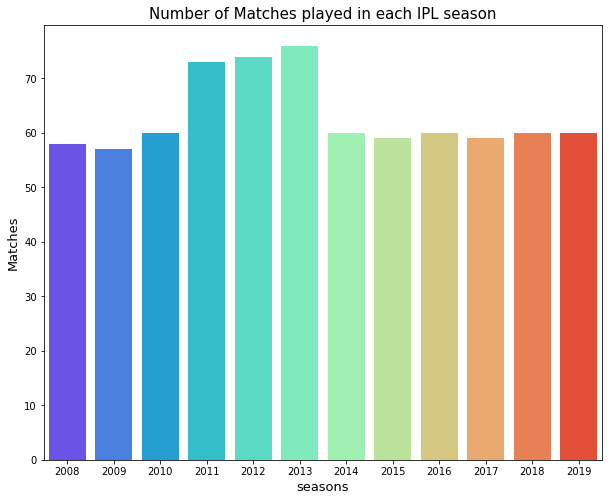

In [12]:
# Number of Matches played in each IPL season:
plt.figure(figsize = (10,8))
sns.countplot('season',data=df_match,palette="rainbow")
plt.title("Number of Matches played in each IPL season",fontsize=15)
plt.xlabel("seasons",fontsize=13)
plt.ylabel('Matches',fontsize=13)
plt.show()

## Note:
- **The Most number of mahches played in IPL season was in 2013**
- **The Least number of matches played in IPL season was in 2009**

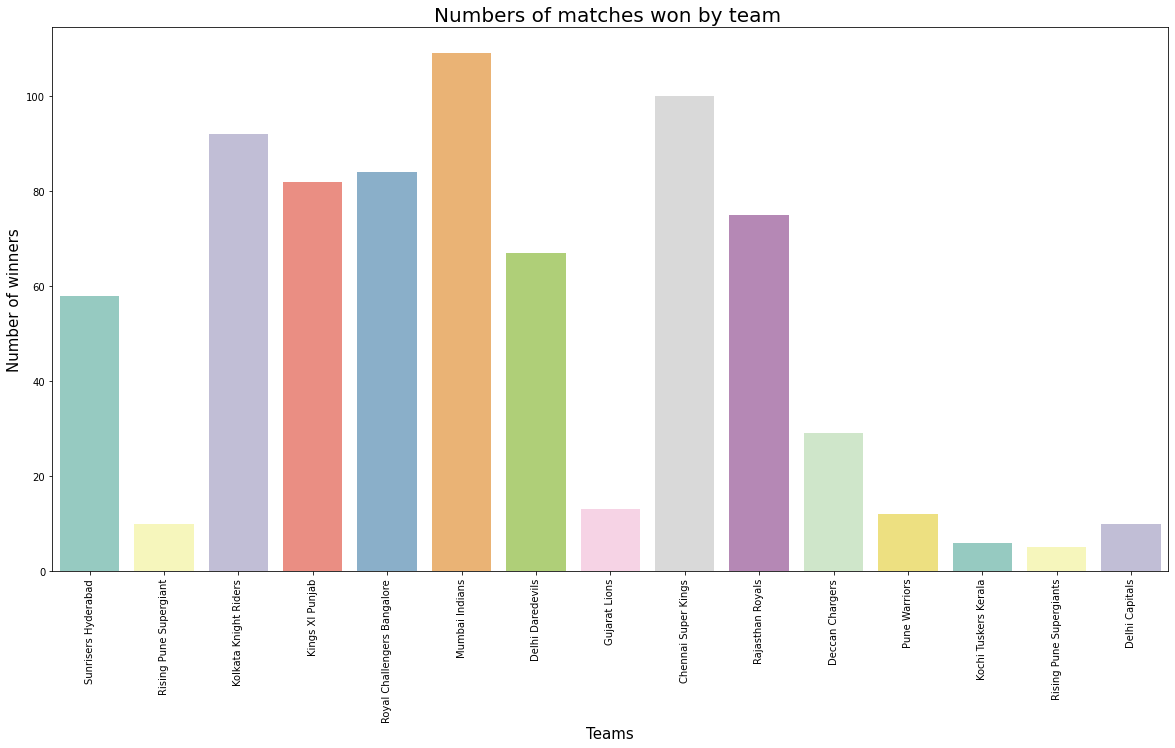

In [13]:
# Numbers of matches won by team:
plt.figure(figsize = (20,10))
sns.countplot(x='winner',data=df_match, palette='Set3')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("Number of winners",fontsize=15)
plt.show()

## Note:
- **Mumbal Indians was The most Winning Team**
- **Rising Pure Supergiants**

In [14]:
df_match['win_by']=np.where(df_match['win_by_runs']>0,'Bat first','Bowl first')
df_match['win_by']

0       Bat first
1      Bowl first
2      Bowl first
3      Bowl first
4       Bat first
          ...    
751    Bowl first
752    Bowl first
753    Bowl first
754    Bowl first
755     Bat first
Name: win_by, Length: 756, dtype: object

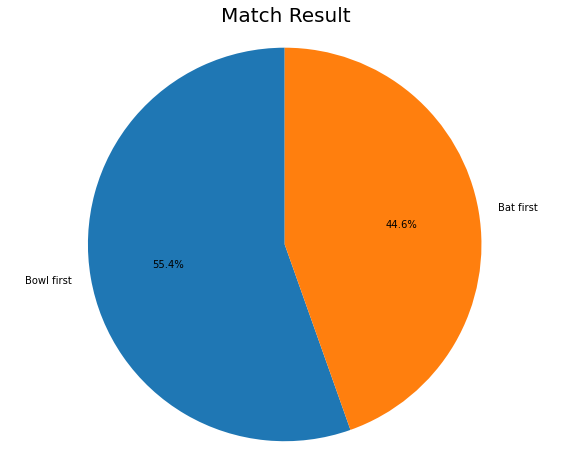

In [15]:
# Matches Results:
Win=df_match.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels,startangle=90,autopct='%1.1f%%')
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

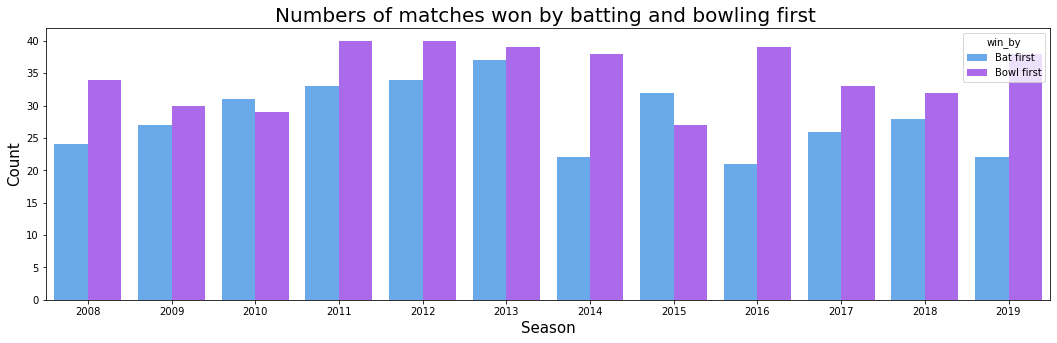

In [16]:
# Numbers of matches won by batting and bowling first:
plt.figure(figsize = (18,5))
sns.countplot('season',hue='win_by',data=df_match,palette='cool')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

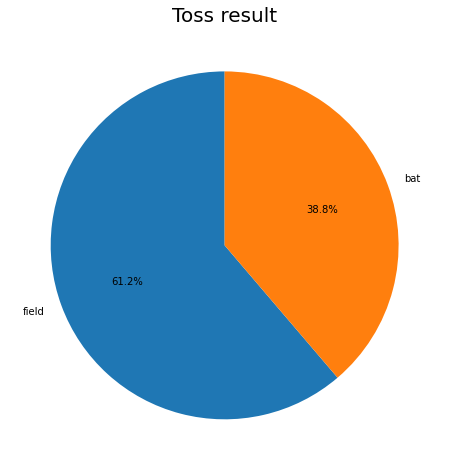

In [17]:
# Toss result:
Toss=df_match.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Toss result',fontsize=20)
plt.show()

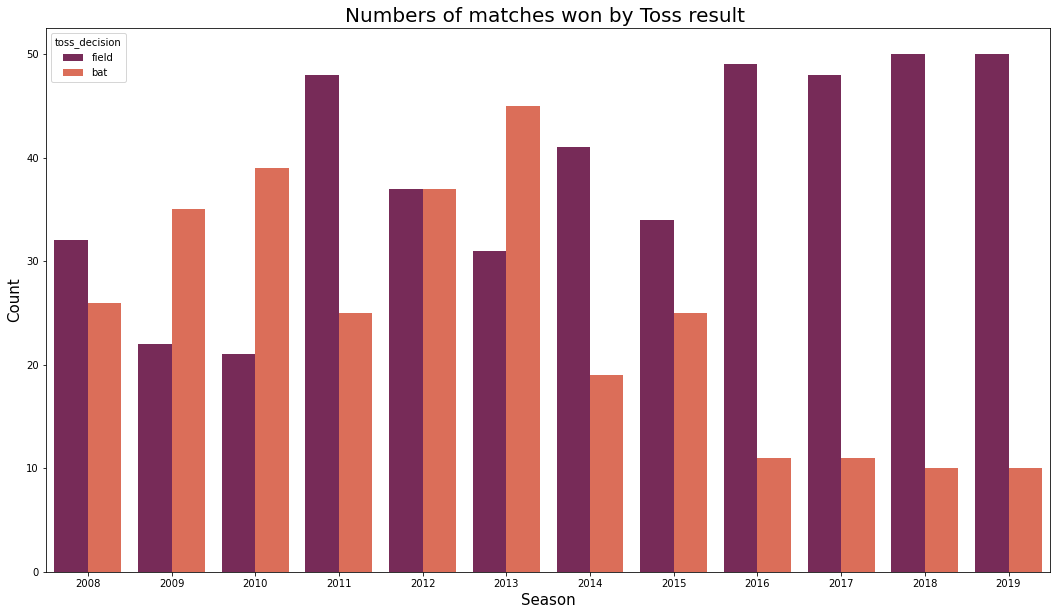

In [18]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=df_match,palette='rocket')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [19]:
# we will print winner season wise:
final_matches=df_match.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [20]:
# we will plot pie chart on Winning percentage in final:
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Match Result',fontsize=20)
plt.show()

NameError: name 'colors' is not defined

<Figure size 720x576 with 0 Axes>

In [ ]:
# Toss Result:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['red', 'yellow']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Toss Result',fontsize=20)
plt.show()

In [ ]:
# names of top players in IPL:
plt.figure(figsize = (20,10))
top_players = df_match.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, palette="rainbow");
plt.show()

## Note:
- **The Top Two players are(CH Gayle & AB de Viliers)**
- **The Last Player is (MEK Hussey)**

In [ ]:
# IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

In [ ]:
# number of seasons won by teams:
final_matches["winner"].value_counts()

## Note:
- **The Top Team who won in Final Matches is Mumbai Indians**

In [ ]:
# toss winner, toss decision, winner in final matches:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

In [ ]:
# The man of the match:
final_matches[['winner','player_of_match']].reset_index(drop=True)

In [ ]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

In [ ]:
four_df=df[df['batsman_runs']==4]
four_df.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

In [ ]:
# Numbers of fours hit by players:
batsman_four=four_df.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("Number of fours",fontsize=15)
plt.show()

In [ ]:
# Numbers of fours hit in each season:
ax=four_df.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [ ]:
# Number of sixes hit by team:
six_df=df[df['batsman_runs']==6]
six_df.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

In [21]:
# Numbers of six hit by players:
batsman_six=six_df.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='brown')
plt.title("Numbers of six hit by players ",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

NameError: name 'six_df' is not defined

In [22]:
# Numbers of fours hit in each season:
ax=six_df.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'black')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

NameError: name 'six_df' is not defined

In [23]:
# Top 10 Leading Run Scorer in IPL:
batsman_score=df_deliver.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Leading Run Scorer in IPL")
batsman_score.iloc[:10,:]

Top 10 Leading Run Scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [24]:
# Number of matches played by batsman:
no_mat_player= df_deliver[["match_id","player_dismissed"]]
no_mat_player =no_mat_player.groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
no_mat_player.columns=["batsman","No_of Matches"]
no_mat_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


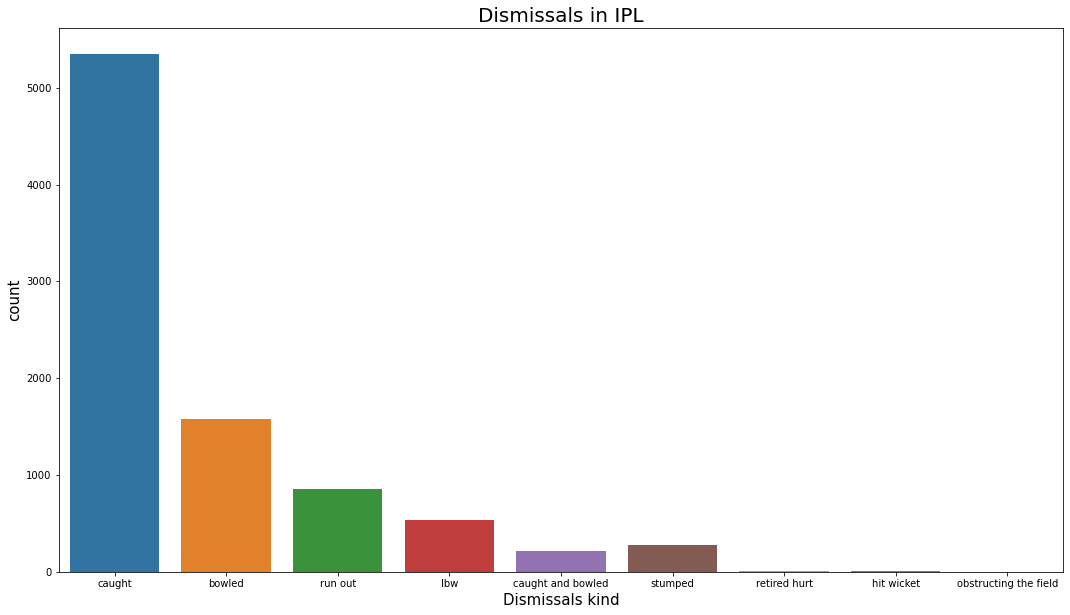

In [25]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(df_deliver.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

In [26]:
wicket_df=df_deliver.dropna(subset=['dismissal_kind'])
wicket_df=wicket_df[~wicket_df['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

# IPL most wicket taking bowlers:
wicket_df.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Conclusions:

- **Teams which Bowl first has higher chances of winning then the team which bat first.**
- **After winning toss more teams decide to do fielding first.**
- **Top player of match winning are CH gayle, AB de villers.**
- **The highest number of match won by Mumbai Indians.**
- **The highest number of matches played by player name are SK Raina, RG Sharma.**
- **The highest number of four hit by player is Shikar Dhawan.**

## Thanks